### **lab 10 - tasks**
#### **ibrahim johar - 23K-0074**

#### **task 01**

In [1]:
import pandas as pd

df = pd.read_csv("Credit Card Customer Data.csv")

df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [3]:
X = df.select_dtypes(['int64', 'float64'])

In [4]:
X.columns.tolist()

['Sl_No',
 'Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [5]:
from sklearn.preprocessing import StandardScaler

#standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

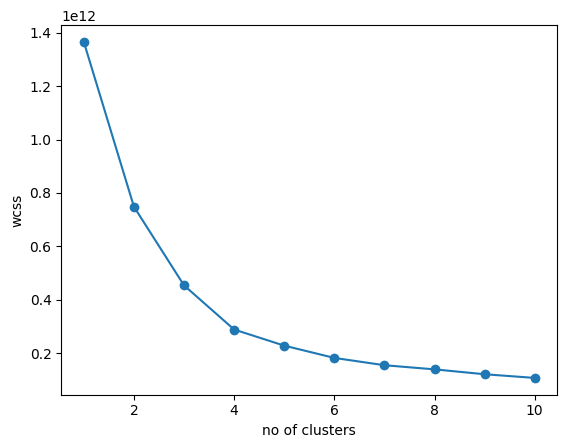

In [11]:
#elbow method to find optimal K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

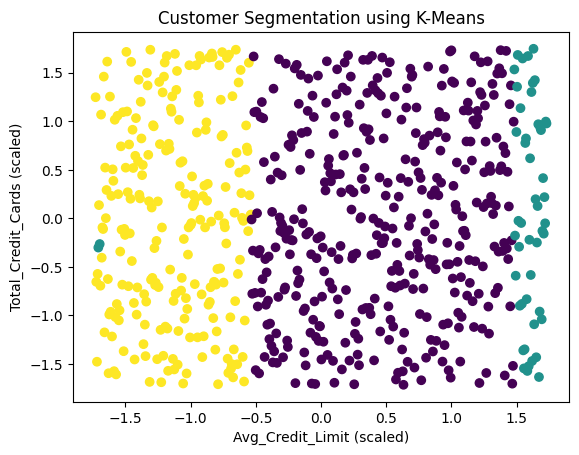

In [12]:
plt.scatter(
    X_scaled[:, 0],     # Avg_Credit_Limit
    X_scaled[:, 1],     # Total_Credit_Cards
    c=df["Cluster"],
    cmap="viridis"
)

plt.xlabel("Avg_Credit_Limit (scaled)")
plt.ylabel("Total_Credit_Cards (scaled)")
plt.title("Customer Segmentation using K-Means")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 4  # optimal number of clusters from the elbow method

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

#labels
df["Cluster"] = kmeans.labels_

#centroids
centroids = kmeans.cluster_centers_

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,3
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,1


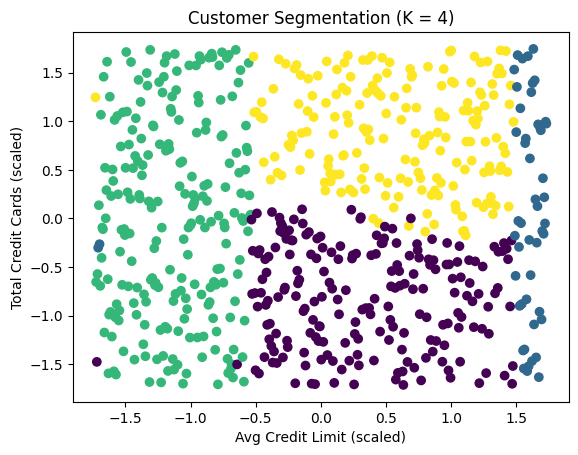

In [14]:
plt.scatter(
    X_scaled[:, 0],      # Avg_Credit_Limit
    X_scaled[:, 1],      # Total_Credit_Cards
    c=df["Cluster"],
    cmap='viridis'
)
plt.xlabel("Avg Credit Limit (scaled)")
plt.ylabel("Total Credit Cards (scaled)")
plt.title("Customer Segmentation (K = 4)")
plt.show()

#### **task 02**

In [17]:
df2 = pd.read_excel("Online Retail.xlsx")

df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [20]:
df2.shape

(541909, 8)

In [21]:
#remove missing customer IDs
df2.dropna(subset=['CustomerID'], inplace=True)

#remove negative quantities
df2 = df2[df2["Quantity"] > 0]

#compute TotalAmount
df2["TotalAmount"] = df2["Quantity"] * df2["UnitPrice"]

#group by customer
customer_df = df2.groupby("CustomerID").agg({
    "TotalAmount": "sum",
    "Quantity": "sum"    
}).reset_index()

customer_df.columns = ["CustomerID", "TotalAmountSpent", "TotalItemsPurchased"]

customer_df.head()

,CustomerID,TotalAmountSpent,TotalItemsPurchased
0,12346.0,77183.60,74215
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197


In [22]:
X = customer_df[["TotalAmountSpent", "TotalItemsPurchased"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

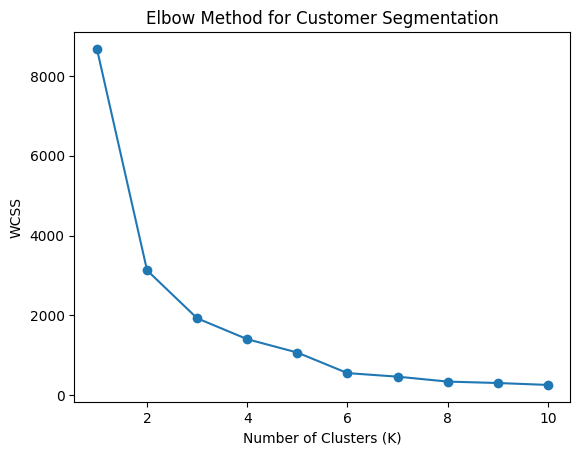

In [24]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Customer Segmentation")
plt.show()

In [26]:
from sklearn.cluster import KMeans 

k = 3   #from elbow method

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

#assign labels
customer_df["Cluster"] = kmeans.labels_

#get centroids
centeroids = kmeans.cluster_centers_

customer_df.head(10)

,CustomerID,TotalAmountSpent,TotalItemsPurchased,Cluster
0,12346.0,77183.60,74215,1
1,12347.0,4310.00,2458,0
2,12348.0,1797.24,2341,0
3,12349.0,1757.55,631,0
4,12350.0,334.40,197,0
5,12352.0,2506.04,536,0
6,12353.0,89.00,20,0
7,12354.0,1079.40,530,0
8,12355.0,459.40,240,0
9,12356.0,2811.43,1591,0


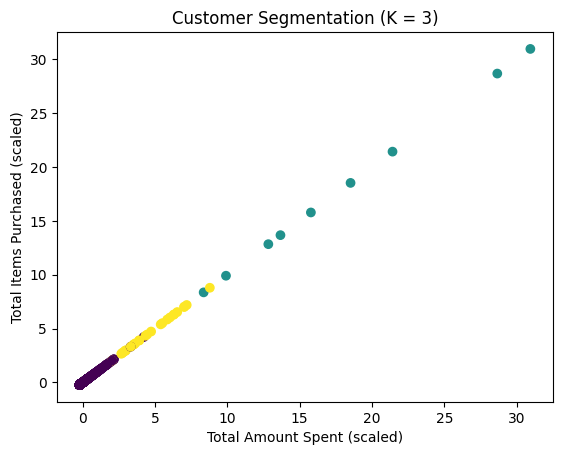

In [28]:
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 0],
    c=customer_df["Cluster"],
    cmap="viridis"
)

plt.xlabel("Total Amount Spent (scaled)")
plt.ylabel("Total Items Purchased (scaled)")
plt.title("Customer Segmentation (K = 3)")
plt.show()

Cluster 0 - Low-Value Customers (Budget Shoppers)

Very low total spending

Buy very few items

Largest segment

Business insight:
- These customers may respond well to discounts, bundles, or low-cost product recommendations.

Cluster 1 - Mid-Value Customers (Average Shoppers)

- Moderate spending levels

- Buy a reasonable number of items

- Middle-sized segment
    Business insight:
    - Can be upsold into higher-value products using loyalty rewards or personalized offers.

Cluster 2 - High-Value Customers (Premium Shoppers)

- Very high total spending

- Purchase many items

- Smallest but most profitable group
    Business insight:
    - Should be prioritized for premium services, early access sales, and VIP-level retention strategies.

#### **task 03**

**for PCA**
1. Load & inspect
2. Select numeric features
3. Standardize
4. Compute PCA
5. Check explained variance
6. Choose number of components
7. Transform data
8. Interpret components

In [29]:
df = pd.read_csv("CC GENERAL.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [30]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [31]:
df.shape

(8950, 18)

In [32]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

313 minimum payment missing

In [33]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [34]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [35]:
df = df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col.fillna(col.mode()[0]))

In [36]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
features = df.columns.tolist()

features

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [38]:
features = features[1:]

In [39]:
features

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [44]:
df = df[features]

In [45]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<Axes: >

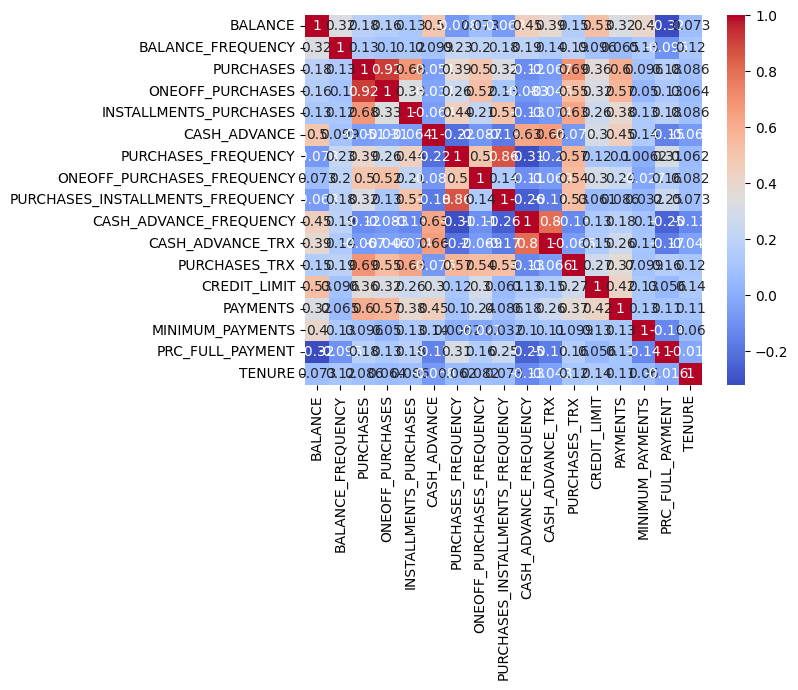

In [46]:
import seaborn as sns 

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [51]:
#standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

In [52]:
#apply PCA
from sklearn.decomposition import PCA 

pca = PCA()
pca.fit(df)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [53]:
#check variance
explained_variance = pca.explained_variance_ratio_

print("explained:\n")
for i,v in enumerate(explained_variance, start=1):
    print(f"PC{i}: {v:.3f}")

explained:

PC1: 0.273
PC2: 0.203
PC3: 0.088
PC4: 0.075
PC5: 0.062
PC6: 0.057
PC7: 0.049
PC8: 0.043
PC9: 0.038
PC10: 0.031
PC11: 0.024
PC12: 0.018
PC13: 0.014
PC14: 0.012
PC15: 0.010
PC16: 0.003
PC17: 0.000


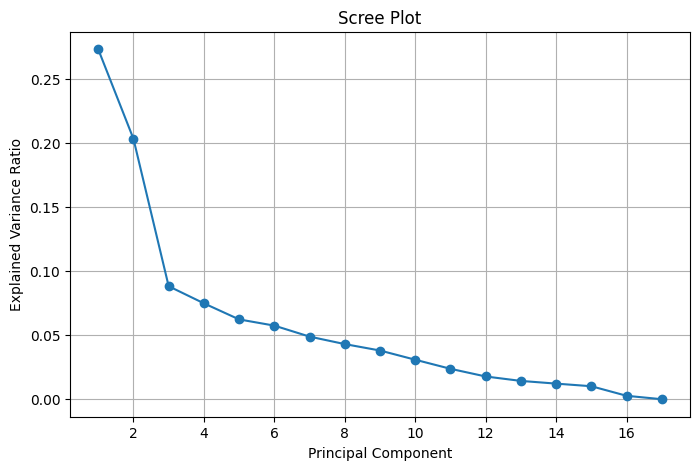

In [54]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [55]:
import numpy as np

cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.27297671, 0.47611451, 0.56424633, 0.63904157, 0.70128886,
       0.75868943, 0.80752368, 0.85051572, 0.8884983 , 0.91929833,
       0.94302084, 0.96075453, 0.9750331 , 0.9872023 , 0.99732897,
       0.99999931, 1.        ])

In [56]:
k = np.argmax(cumulative_variance >= 0.90)+1

cumulative_variance[:k]

array([0.27297671, 0.47611451, 0.56424633, 0.63904157, 0.70128886,
       0.75868943, 0.80752368, 0.85051572, 0.8884983 , 0.91929833])

In [ ]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(df) 

X_pca[:5]   #show first five transformed rows

array([[-1.68364879, -1.07224148, -0.47566008,  0.67992776, -0.04319508,
        -0.06806942],
       [-1.13408493,  2.50914981, -0.60221631, -0.10954206, -0.66263777,
         1.10225463],
       [ 0.96939499, -0.3835769 , -0.09096976,  1.2383594 ,  2.16658421,
         0.32018501],
       [-0.88822039,  0.00464842, -1.49980039,  1.07527139, -0.22582787,
         0.17153978],
       [-1.60002095, -0.68379524, -0.34792671,  1.01364222,  0.45381574,
        -0.07700427]])

In [64]:
#component loadings (interpretation)
loadings = pd.DataFrame(
    pca.components_.T,
    columns= [f"PC{i+1}" for i in range(6)],
    index = features
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6
BALANCE,0.101735,0.403819,0.161632,0.279316,-0.051022,-0.042752
BALANCE_FREQUENCY,0.120490,0.131344,0.422995,0.155762,0.476836,-0.022045
PURCHASES,0.411562,0.040025,-0.257474,0.041621,-0.027887,-0.180453
ONEOFF_PURCHASES,0.346334,0.061918,-0.390899,0.085079,0.160839,-0.179984
INSTALLMENTS_PURCHASES,0.336761,-0.019175,0.109268,-0.057915,-0.361402,-0.096003
CASH_ADVANCE,-0.022810,0.439027,0.023128,-0.256596,-0.097560,0.145018
PURCHASES_FREQUENCY,0.321232,-0.191148,0.371394,-0.194564,0.099667,0.046867
ONEOFF_PURCHASES_FREQUENCY,0.294493,-0.018561,-0.115565,0.034279,0.540330,0.003524
PURCHASES_INSTALLMENTS_FREQUENCY,0.274494,-0.178869,0.469579,-0.225288,-0.176996,0.048051
CASH_ADVANCE_FREQUENCY,-0.088582,0.434121,0.104709,-0.264628,0.145160,-0.058183


| PC      | Meaning                                                          |
| ------- | ---------------------------------------------------------------- |
| **PC1** | General purchasing activity (high spenders, frequent purchasers) |
| **PC2** | Cash advance usage behaviors                                     |
| **PC3** | Installment vs one-off purchase orientation                      |
| **PC4** | Payment discipline & minimum payment behavior                    |
| **PC5** | One-off purchase frequency & wallet stability                    |
| **PC6** | Customer longevity, high credit limit, full-payment patterns     |
